## Предобработка данных и логистическая регрессия для задачи бинарной классификации

## Programming assignment

В задании вам будет предложено ознакомиться с основными техниками предобработки данных, а так же применить их для обучения модели логистической регрессии. Ответ потребуется загрузить в соответствующую форму в виде 6 текстовых файлов.

Для выполнения задания требуется Python версии 2.7 или 3.5, а также актуальные версии библиотек:
- NumPy: 1.10.4 и выше
- Pandas: 0.17.1 и выше
- Scikit-learn: 0.17 и выше

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

## Описание датасета

Задача: по 38 признакам, связанных с заявкой на грант (область исследований учёных, информация по их академическому бэкграунду, размер гранта, область, в которой он выдаётся) предсказать, будет ли заявка принята. Датасет включает в себя информацию по 6000 заявкам на гранты, которые были поданы в университете Мельбурна в период с 2004 по 2008 год.

Полную версию данных с большим количеством признаков можно найти на https://www.kaggle.com/c/unimelb.

In [2]:
data = pd.read_csv('data.csv')
data.shape

(6000, 39)

Выделим из датасета целевую переменную Grant.Status и обозначим её за y
Теперь X обозначает обучающую выборку, y - ответы на ней

In [3]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']

## Теория по логистической регрессии

После осознания того, какую именно задачу требуется решить на этих данных, следующим шагом при реальном анализе был бы подбор подходящего метода. В данном задании выбор метода было произведён за вас, это логистическая регрессия. Кратко напомним вам используемую модель.

Логистическая регрессия предсказывает вероятности принадлежности объекта к каждому классу. Сумма ответов логистической регрессии на одном объекте для всех классов равна единице.

$$ \sum_{k=1}^K \pi_{ik} = 1, \quad \pi_k \equiv P\,(y_i = k \mid x_i, \theta), $$

где:
- $\pi_{ik}$ - вероятность принадлежности объекта $x_i$ из выборки $X$ к классу $k$
- $\theta$ - внутренние параметры алгоритма, которые настраиваются в процессе обучения, в случае логистической регрессии - $w, b$

Из этого свойства модели в случае бинарной классификации требуется вычислить лишь вероятность принадлежности объекта к одному из классов (вторая вычисляется из условия нормировки вероятностей). Эта вероятность вычисляется, используя логистическую функцию:

$$ P\,(y_i = 1 \mid x_i, \theta) = \frac{1}{1 + \exp(-w^T x_i-b)} $$

Параметры $w$ и $b$ находятся, как решения следующей задачи оптимизации (указаны функционалы с L1 и L2 регуляризацией, с которыми вы познакомились в предыдущих заданиях):

L2-regularization:

$$ Q(X, y, \theta) = \frac{1}{2} w^T w + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

L1-regularization:

$$ Q(X, y, \theta) = \sum_{d=1}^D |w_d| + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

$C$ - это стандартный гиперпараметр модели, который регулирует то, насколько сильно мы позволяем модели подстраиваться под данные.

## Предобработка данных

Из свойств данной модели следует, что:
- все $X$ должны быть числовыми данными (в случае наличия среди них категорий, их требуется некоторым способом преобразовать в вещественные числа)
- среди $X$ не должно быть пропущенных значений (т.е. все пропущенные значения перед применением модели следует каким-то образом заполнить)

Поэтому базовым этапом в предобработке любого датасета для логистической регрессии будет кодирование категориальных признаков, а так же удаление или интерпретация пропущенных значений (при наличии того или другого).

In [4]:
data.head()

Grant.Status Sponsor.Code Grant.Category.Code  \
0             1          21A                 50A   
1             1           4D                 10A   
2             0          NaN                 NaN   
3             0          51C                 20C   
4             0          24D                 30B   

  Contract.Value.Band...see.note.A  RFCD.Code.1  RFCD.Percentage.1  \
0                               A        230202                 50   
1                               D        320801                100   
2                              NaN       320602                 50   
3                               A        291503                 60   
4                              NaN       380107                100   

   RFCD.Code.2  RFCD.Percentage.2  RFCD.Code.3  RFCD.Percentage.3 ...   \
0       230203                 30       230204                 20 ...    
1            0                  0            0                  0 ...    
2       321004                 30       321015                 20 ...    
3       321402                 40            0                  0 ...    
4            0                  0            0                  0 ...    

   Dept.No..1  Faculty.No..1  With.PHD.1  \
0        3098             31        Yes    
1        2553             25        Yes    
2        2813             25         NaN   
3        2553             25         NaN   
4        2923             25         NaN   

   No..of.Years.in.Uni.at.Time.of.Grant.1  Number.of.Successful.Grant.1  \
0                                >=0 to 5                             2   
1                                >=0 to 5                             3   
2                             Less than 0                             1   
3                            more than 15                             2   
4                             Less than 0                             0   

   Number.of.Unsuccessful.Grant.1  A..1  A.1  B.1  C.1  
0                               0     0    4    2    0  
1                               1     0    2    0    0  
2                               5     0    7    2    0  
3                               1     5    6    9    1  
4                               2     0    0    0    0  

[5 rows x 39 columns]

Видно, что в датасете есть как числовые, так и категориальные признаки. Получим списки их названий:

In [5]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

Также в нём присутствуют пропущенные значения. Очевидны решением будет исключение всех данных, у которых пропущено хотя бы одно значение. Сделаем это:

In [6]:
data.dropna().shape

(213, 39)

Видно, что тогда мы выбросим почти все данные, и такой метод решения в данном случае не сработает.

Пропущенные значения можно так же интерпретировать, для этого существует несколько способов, они различаются для категориальных и вещественных признаков.

Для вещественных признаков:
- заменить на 0 (данный признак давать вклад в предсказание для данного объекта не будет)
- заменить на среднее (каждый пропущенный признак будет давать такой же вклад, как и среднее значение признака на датасете)

Для категориальных:
- интерпретировать пропущенное значение, как ещё одну категорию (данный способ является самым естественным, так как в случае категорий у нас есть уникальная возможность не потерять информацию о наличии пропущенных значений; обратите внимание, что в случае вещественных признаков данная информация неизбежно теряется)

##  Задание 0. Обработка пропущенных значений.
1. Заполните пропущенные вещественные значения в X нулями и средними по столбцам, назовите полученные датафреймы X_real_zeros и X_real_mean соответственно. 
2. Все категориальные признаки в X преобразуйте в строки, пропущенные значения требуется также преобразовать в какие-либо строки, которые не являются категориями (например, 'NA'), полученный датафрейм назовите X_cat.

In [6]:
# place your code here
X_real_zeros= X[numeric_cols].fillna(0)
X_real_mean = X[numeric_cols].fillna(X[numeric_cols].mean())
X_cat = data[categorical_cols].fillna('NA').applymap(lambda s: str(s))


## Преобразование категориальных признаков.

В предыдущей ячейке мы разделили наш датасет ещё на две части: в одной присутствуют только вещественные признаки, в другой только категориальные. Это понадобится нам для раздельной последующей обработке этих данных, а так же для сравнения качества работы тех или иных методов.

Для использования модели регрессии требуется преобразовать категориальные признаки в вещественные. Рассмотрим основной способ преоборазования категориальных признаков в вещественные: one-hot encoding. Его идея заключается в том, что мы преобразуем категориальный признак при помощи бинарного кода: каждой категории ставим в соответствие набор из нулей и единиц.

Посмотрим, как данный метод работает на простом наборе данных.

In [7]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV

categorial_data = pd.DataFrame({'sex': ['male', 'female', 'male', 'female'], 
                                'nationality': ['American', 'European', 'Asian', 'European']})
print('Исходные данные:\n')
print(categorial_data)
encoder = DV(sparse = False)
encoded_data = encoder.fit_transform(categorial_data.T.to_dict().values())
print('\nЗакодированные данные:\n')
print(encoded_data)

Исходные данные:

  nationality     sex
0    American    male
1    European  female
2       Asian    male
3    European  female

Закодированные данные:

[[ 1.  0.  0.  0.  1.]
 [ 0.  0.  1.  1.  0.]
 [ 0.  1.  0.  0.  1.]
 [ 0.  0.  1.  1.  0.]]


Как видно, в первые три колонки оказалась закодированна информация о стране, а во вторые две - о поле. При этом для совпадающих элементов выборки строки будут полностью совпадать. Также из примера видно, что кодирование признаков сильно увеличивает их количество, но полностью сохраняет информацию, в том числе о наличии пропущенных значений (их наличие просто становится одним из бинарных признаков в преобразованных данных).

Теперь применим one-hot encoding к категориальным признакам из исходного датасета. Обратите внимание на общий для всех методов преобработки данных интерфейс. Функция

    encoder.fit_transform(X)
    
позволяет вычислить необходимые параметры преобразования, впоследствии к новым данным можно уже применять функцию

    encoder.transform(X)
    
Очень важно применять одинаковое преобразование как к обучающим, так и тестовым данным, потому что в противном случае вы получите непредсказуемые, и, скорее всего, плохие результаты. В частности, если вы отдельно закодируете обучающую и тестовую выборку, то получите вообще говоря разные коды для одних и тех же признаков, и ваше решение работать не будет.

Также параметры многих преобразований (например, рассмотренное ниже масштабирование) нельзя вычислять одновременно на данных из обучения и теста, потому что иначе подсчитанные на тесте метрики качества будут давать смещённые оценки на качество работы алгоритма. Кодирование категориальных признаков не считает на обучающей выборке никаких параметров, поэтому его можно применять сразу к всему датасету.

In [8]:
encoder = DV(sparse = False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())

Для построения метрики качества по результату обучения требуется разделить исходный датасет на обучающую и тестовую выборки.

Обращаем внимание на заданный параметр для генератора случайных чисел: random_state. Так как результаты на обучении и тесте будут зависеть от того, как именно вы разделите объекты, то предлагается использовать заранее определённое значение для получение результатов, согласованных с ответами в системе проверки заданий.

In [10]:
from sklearn.cross_validation import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.3, 
                                      random_state=0)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0)

## Описание классов

Итак, мы получили первые наборы данных, для которых выполнены оба ограничения логистической регрессии на входные данные. Обучим на них регрессию, используя имеющийся в библиотеке sklearn функционал по подбору гиперпараметров модели
    
    optimizer = GridSearchCV(estimator, param_grid)

где:
- estimator - обучающий алгоритм, для которого будет производиться подбор параметров
- param_grid - словарь параметров, ключами которого являются строки-названия, которые передаются алгоритму estimator, а значения - набор параметров для перебора

Данный класс выполняет кросс-валидацию обучающей выборки для каждого набора параметров и находит те, на которых алгоритм работает лучше всего. Этот метод позволяет настраивать гиперпараметры по обучающей выборке, избегая переобучения. Некоторые опциональные параметры вызова данного класса, которые нам понадобятся:
- scoring - функционал качества, максимум которого ищется кросс валидацией, по умолчанию используется функция score() класса esimator
- n_jobs - позволяет ускорить кросс-валидацию, выполняя её параллельно, число определяет количество одновременно запущенных задач
- cv - количество фолдов, на которые разбивается выборка при кросс-валидации

После инициализации класса GridSearchCV, процесс подбора параметров запускается следующим методом:

    optimizer.fit(X, y)
    
На выходе для получения предсказаний можно пользоваться функцией

    optimizer.predict(X)
    
Также можно напрямую получить оптимальный класс estimator и оптимальные параметры, так как они является атрибутами класса GridSearchCV:
- best\_estimator\_ - лучший алгоритм
- best\_params\_ - лучший набор параметров

Класс логистической регрессии выглядит следующим образом:

    estimator = LogisticRegression(penalty)
   
где penalty принимает либо значение 'l2', либо 'l1'. По умолчанию устанавливается значение 'l2', и везде в задании, если об этом не оговорено особо, предполагается использование логистической регрессии с L2-регуляризацией.

## Задание 1. Сравнение способов заполнения вещественных пропущенных значений.
1. Составьте две обучающие выборки из вещественных и категориальных признаков: в одной вещественные признаки, где пропущенные значения заполнены нулями, в другой - средними.
2. Обучите на них логистическую регрессию, подбирая параметры из заданной сетки param_grid по методу кросс-валидации с числом фолдов cv=3. В качестве оптимизируемой функции используйте заданную по умолчанию.
3. Постройте два графика оценок точности +- их стандратного отклонения в зависимости от гиперпараметра и убедитесь, что вы действительно нашли её максимум. Также обратите внимание на большую дисперсию получаемых оценок (уменьшить её можно увеличением числа фолдов cv).
4. Получите две метрики качества AUC ROC на тестовой выборке и сравните их между собой. Какой способ заполнения пропущенных вещественных значений работает лучше? В дальнейшем для выполнения задания в качестве вещественных признаков используйте ту выборку, которая даёт лучшее качество на тесте.
5. Передайте два значения AUC ROC (сначала для выборки, заполненной средними, потом для выборки, заполненной нулями) в функцию write_answer_1 и запустите её. Полученный файл является ответом на 1 задание.

Информация для интересующихся: вообще говоря, не вполне логично оптимизировать на кросс-валидации заданный по умолчанию в классе логистической регрессии функционал accuracy, а измерять на тесте AUC ROC, но это, как и ограничение размера выборки, сделано для ускорения работы процесса кросс-валидации.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    scores = [[item[0]['C'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
def write_answer_1(auc_1, auc_2):
    answers = [auc_1, auc_2]
    with open("preprocessing_lr_answer1.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in answers]))
        
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3

# place your code here

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.3, 
                                      random_state=0)
X_train_real_mean = np.hstack((X_train_real_mean, X_train_cat_oh))
estimator = LogisticRegression('l2')
optimizer = GridSearchCV(estimator,param_grid,cv=3)
optimizer.fit(np.hstack((X_train_real_zeros, X_train_cat_oh)),y_train)
ap=optimizer.predict(np.hstack((X_test_real_zeros,X_test_cat_oh)))

optimizer.fit(X_train_real_mean,y_train)
bp = optimizer.predict(np.hstack((X_test_real_mean,X_test_cat_oh)))
print roc_auc_score(y_test, ap)
print roc_auc_score(y_test, bp)

0.807761792041
0.806860970289


## Масштабирование вещественных признаков.

Попробуем как-то улучшить качество классификации. Для этого посмотрим на сами данные:

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


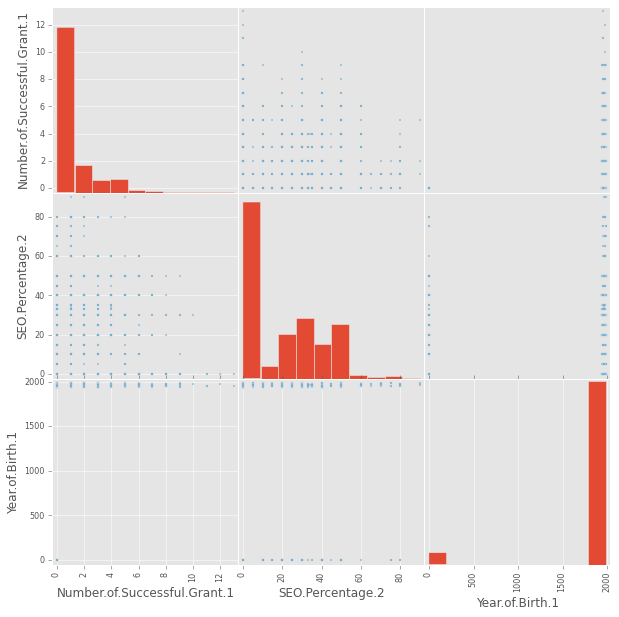

In [12]:
from pandas.tools.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_train_real_zeros, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

Как видно из графиков, разные признаки очень сильно отличаются друг от друга по модулю значений (обратите внимание на диапазоны значений осей x и y). В случае обычной регрессии это никак не влияет на качество обучаемой модели, т.к. у меньших по модулю признаков будут большие веса, но при использовании регуляризации, которая штрафует модель за большие веса, регрессия, как правило, начинает работать хуже.

В таких случаях всегда рекомендуется делать стандартизацию (масштабирование) признаков, для того чтобы они меньше отличались друг друга по модулю, но при этом не нарушались никакие другие свойства признакового пространства. При этом даже если итоговое качество модели на тесте уменьшается, это повышает её интерпретабельность, потому что новые веса имеют смысл "значимости" данного признака для итоговой классификации.

Стандартизация осуществляется посредством вычета из каждого признака среднего значения и нормировки на выборочное стандартное отклонение:

$$ x^{scaled}_{id} = \dfrac{x_{id} - \mu_d}{\sigma_d}, \quad \mu_d = \frac{1}{N} \sum_{i=1}^l x_{id}, \quad \sigma_d = \sqrt{\frac{1}{N-1} \sum_{i=1}^l (x_{id} - \mu_d)^2} $$

## Задание 1.5. Масштабирование вещественных признаков.

1. По аналогии с вызовом one-hot encoder примените масштабирование вещественных признаков для обучающих и тестовых выборок X_train_real_zeros и X_test_real_zeros, используя класс 

        StandardScaler
   
   и методы 

        StandardScaler.fit_transform(...)
        StandardScaler.transform(...)
2. Сохраните ответ в переменные X_train_real_scaled и X_test_real_scaled соответственно

In [13]:
from sklearn.preprocessing import StandardScaler

# place your code here
scaler = StandardScaler()
X_train_real_scaled = scaler.fit_transform(X_train_real_zeros)
X_test_real_scaled = scaler.transform(X_test_real_zeros)

## Сравнение признаковых пространств.

Построим такие же графики для преобразованных данных:

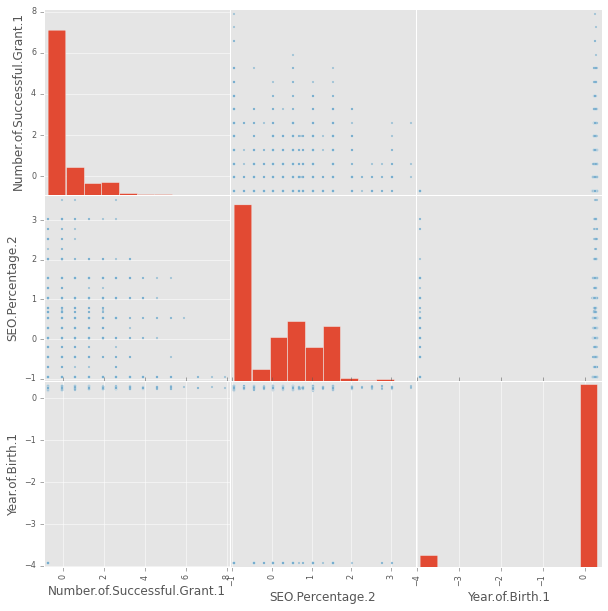

In [14]:
data_numeric_scaled = pd.DataFrame(X_train_real_scaled, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric_scaled[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

Как видно из графиков, мы не поменяли свойства признакового пространства: гистограммы распределений значений признаков, как и их scatter-plots, выглядят так же, как и до нормировки, но при этом все значения теперь находятся примерно в одном диапазоне, тем самым повышая интерпретабельность результатов, а также лучше сочетаясь с идеологией регуляризации.

## Задание 2. Сравнение качества классификации до и после масштабирования вещественных признаков.
1. Обучите ещё раз регрессию и гиперпараметры на новых признаках, объединив их с закодированными категориальными.
2. Проверьте, был ли найден оптимум accuracy по гиперпараметрам во время кроссвалидации.
3. Получите значение ROC AUC на тестовой выборке, сравните с лучшим результатом, полученными ранее.
4. Запишите полученный ответ в файл при помощи функции write_answer_2.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score


        
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3

# place your code here


X_train_real_zeros= np.hstack((X_train_real_scaled, X_train_cat_oh))
X_test_real_zeros= np.hstack((X_test_real_scaled, X_test_cat_oh))

estimator = LogisticRegression('l2')
optimizer = GridSearchCV(estimator,param_grid,cv=3)
a= optimizer.fit(X_train_real_zeros,y_train)
ap=optimizer.predict(X_test_real_zeros)
print roc_auc_score(y_test, ap)


0.80585373278


## Балансировка классов.

Алгоритмы классификации могут быть очень чувствительны к несбалансированным классам. Рассмотрим пример с выборками, сэмплированными из двух гауссиан. Их мат. ожидания и матрицы ковариации заданы так, что истинная разделяющая поверхность должна проходить параллельно оси x. Поместим в обучающую выборку 20 объектов, сэмплированных из 1-й гауссианы, и 10 объектов из 2-й. После этого обучим на них линейную регрессию, и построим на графиках объекты и области классификации.

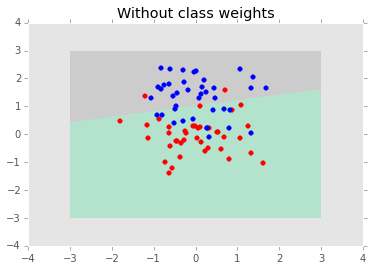

AUC: 0.775000


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
    ...........................................................................
/opt/conda/envs/python2/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    157     pkg_name = mod_name.rpartition('.')[0]
    158     main_globals = sys.modules["__main__"].__dict__
    159     if alter_argv:
    160         sys.argv[0] = fname
    161     return _run_code(code, main_globals, None,
--> 162                      "__main__", fname, loader, pkg_name)
        fname = '/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    163 
    164 def run_module(mod_name, init_globals=None,
    165                run_name=None, alter_sys=False):
    166     """Execute a module's code without importing it

...........................................................................
/opt/conda/envs/python2/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x7f09021085b0, file "/...2.7/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/opt/conda/e.../python2.7/site-packages/ipykernel/kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_fname='/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x7f09021085b0, file "/...2.7/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/opt/conda/e.../python2.7/site-packages/ipykernel/kernelapp.py'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    587         
    588         If a global instance already exists, this reinitializes and starts it
    589         """
    590         app = cls.instance(**kwargs)
    591         app.initialize(argv)
--> 592         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    593 
    594 #-----------------------------------------------------------------------------
    595 # utility functions, for convenience
    596 #-----------------------------------------------------------------------------

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    398         
    399         if self.poller is not None:
    400             self.poller.start()
    401         self.kernel.start()
    402         try:
--> 403             ioloop.IOLoop.instance().start()
    404         except KeyboardInterrupt:
    405             pass
    406 
    407 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    146             PollIOLoop.configure(ZMQIOLoop)
    147         return PollIOLoop.instance()
    148     
    149     def start(self):
    150         try:
--> 151             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    152         except ZMQError as e:
    153             if e.errno == ETERM:
    154                 # quietly return on ETERM
    155                 pass

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    861                 self._events.update(event_pairs)
    862                 while self._events:
    863                     fd, events = self._events.popitem()
    864                     try:
    865                         fd_obj, handler_func = self._handlers[fd]
--> 866                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    867                     except (OSError, IOError) as e:
    868                         if errno_from_exception(e) == errno.EPIPE:
    869                             # Happens when the client closes the connection
    870                             pass

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    428             # dispatch events:
    429             if events & IOLoop.ERROR:
    430                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    431                 return
    432             if events & IOLoop.READ:
--> 433                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    434                 if not self.socket:
    435                     return
    436             if events & IOLoop.WRITE:
    437                 self._handle_send()

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    460                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    461         else:
    462             if self._recv_callback:
    463                 callback = self._recv_callback
    464                 # self._recv_callback = None
--> 465                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    466                 
    467         # self.update_state()
    468         
    469 

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    402         close our socket."""
    403         try:
    404             # Use a NullContext to ensure that all StackContexts are run
    405             # inside our blanket exception handler rather than outside.
    406             with stack_context.NullContext():
--> 407                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    408         except:
    409             gen_log.error("Uncaught exception, closing connection.",
    410                           exc_info=True)
    411             # Close the socket on an uncaught exception from a user callback

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    255         if self.control_stream:
    256             self.control_stream.on_recv(self.dispatch_control, copy=False)
    257 
    258         def make_dispatcher(stream):
    259             def dispatcher(msg):
--> 260                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    261             return dispatcher
    262 
    263         for s in self.shell_streams:
    264             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'np.random.seed(0)\n"""\u0421\u044d\u043c\u043f...t.show()\nprint(\'AUC: %f\'%auc_w_class_weights)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-04-13T18:25:34.168903', u'msg_id': u'A948AE382D4645B68E20D6EBD93F57E5', u'msg_type': u'execute_request', u'session': u'B4601030CC37445282700B557449CDE8', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'A948AE382D4645B68E20D6EBD93F57E5', 'msg_type': u'execute_request', 'parent_header': {}})
    207             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    208         else:
    209             self.log.debug("%s: %s", msg_type, msg)
    210             self.pre_handler_hook()
    211             try:
--> 212                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['B4601030CC37445282700B557449CDE8']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'np.random.seed(0)\n"""\u0421\u044d\u043c\u043f...t.show()\nprint(\'AUC: %f\'%auc_w_class_weights)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-04-13T18:25:34.168903', u'msg_id': u'A948AE382D4645B68E20D6EBD93F57E5', u'msg_type': u'execute_request', u'session': u'B4601030CC37445282700B557449CDE8', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'A948AE382D4645B68E20D6EBD93F57E5', 'msg_type': u'execute_request', 'parent_header': {}}
    213             except Exception:
    214                 self.log.error("Exception in message handler:", exc_info=True)
    215             finally:
    216                 self.post_handler_hook()

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['B4601030CC37445282700B557449CDE8'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'np.random.seed(0)\n"""\u0421\u044d\u043c\u043f...t.show()\nprint(\'AUC: %f\'%auc_w_class_weights)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-04-13T18:25:34.168903', u'msg_id': u'A948AE382D4645B68E20D6EBD93F57E5', u'msg_type': u'execute_request', u'session': u'B4601030CC37445282700B557449CDE8', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'A948AE382D4645B68E20D6EBD93F57E5', 'msg_type': u'execute_request', 'parent_header': {}})
    365         if not silent:
    366             self.execution_count += 1
    367             self._publish_execute_input(code, parent, self.execution_count)
    368 
    369         reply_content = self.do_execute(code, silent, store_history,
--> 370                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    371 
    372         # Flush output before sending the reply.
    373         sys.stdout.flush()
    374         sys.stderr.flush()

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'np.random.seed(0)\n"""\u0421\u044d\u043c\u043f...t.show()\nprint(\'AUC: %f\'%auc_w_class_weights)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    170 
    171         reply_content = {}
    172         # FIXME: the shell calls the exception handler itself.
    173         shell._reply_content = None
    174         try:
--> 175             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'np.random.seed(0)\n"""\u0421\u044d\u043c\u043f...t.show()\nprint(\'AUC: %f\'%auc_w_class_weights)'
        store_history = True
        silent = False
    176         except:
    177             status = u'error'
    178             # FIXME: this code right now isn't being used yet by default,
    179             # because the run_cell() call above directly fires off exception

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'np.random.seed(0)\n"""\u0421\u044d\u043c\u043f...t.show()\nprint(\'AUC: %f\'%auc_w_class_weights)', store_history=True, silent=False, shell_futures=True)
   2897                 self.displayhook.exec_result = result
   2898 
   2899                 # Execute the user code
   2900                 interactivity = "none" if silent else self.ast_node_interactivity
   2901                 self.run_ast_nodes(code_ast.body, cell_name,
-> 2902                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2903 
   2904                 # Reset this so later displayed values do not modify the
   2905                 # ExecutionResult
   2906                 self.displayhook.exec_result = None

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, ...], cell_name='<ipython-input-16-6032a92ae474>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3001 
   3002         try:
   3003             for i, node in enumerate(to_run_exec):
   3004                 mod = ast.Module([node])
   3005                 code = compiler(mod, cell_name, "exec")
-> 3006                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f089af5e3b0, file "<ipython-input-16-6032a92ae474>", line 29>
        result = <IPython.core.interactiveshell.ExecutionResult object>
   3007                     return True
   3008 
   3009             for i, node in enumerate(to_run_interactive):
   3010                 mod = ast.Interactive([node])

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f089af5e3b0, file "<ipython-input-16-6032a92ae474>", line 29>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3061         outflag = 1  # happens in more places, so it's easier as default
   3062         try:
   3063             try:
   3064                 self.hooks.pre_run_code_hook()
   3065                 #rprint('Running code', repr(code_obj)) # dbg
-> 3066                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f089af5e3b0, file "<ipython-input-16-6032a92ae474>", line 29>
        self.user_global_ns = {'DV': <class 'sklearn.feature_extraction.dict_vectorizer.DictVectorizer'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', u"import pandas as pd\nimport numpy as np\nimpor...lot')\nget_ipython().magic(u'matplotlib inline')", u"data = pd.read_csv('data.csv')\ndata.shape", u"X = data.drop('Grant.Status', 1)\ny = data['Grant.Status']", u"numeric_cols = ['RFCD.Percentage.1', 'RFCD.Per...(X.columns.values.tolist()) - set(numeric_cols))", u"numeric_cols = ['RFCD.Percentage.1', 'RFCD.Per...(X.columns.values.tolist()) - set(numeric_cols))", u"# place your code here\nX_real_zeros= X[numeri...al_cols].fillna('NA').applymap(lambda s: str(s))", u"from sklearn.linear_model import LogisticRegre...43d\u043d\u044b\u0435:\\n')\nprint(encoded_data)", u'encoder = DV(sparse = False)\nX_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())', u'from sklearn.cross_validation import train_tes...                                 random_state=0)', u'from sklearn.cross_validation import train_tes...                                 random_state=0)', u'from sklearn.linear_model import LogisticRegre...ore(y_test, ap)\nprint roc_auc_score(y_test, bp)', u"from pandas.tools.plotting import scatter_matr..._cols], alpha=0.5, figsize=(10, 10))\nplt.show()", u'from sklearn.preprocessing import StandardScal...eal_scaled = scaler.transform(X_test_real_zeros)', u"data_numeric_scaled = pd.DataFrame(X_train_rea..._cols], alpha=0.5, figsize=(10, 10))\nplt.show()", u"from sklearn.linear_model import LogisticRegre...est_real_zeros)\nprint roc_auc_score(y_test, ap)", u'np.random.seed(0)\n"""\u0421\u044d\u043c\u043f...t.show()\nprint(\'AUC: %f\'%auc_w_class_weights)'], 'LR': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {2: (6000, 39)}, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X':      Sponsor.Code Grant.Category.Code Contract.V...   2  
5999    2    1  

[6000 rows x 38 columns], 'X_cat':           Country.of.Birth.1 SEO.Code.4 SEO.Code...             NA   0.0  

[6000 rows x 25 columns], 'X_cat_oh': array([[ 1.,  0.,  0., ...,  0.,  0.,  1.],
    ...0.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.]]), ...}
        self.user_ns = {'DV': <class 'sklearn.feature_extraction.dict_vectorizer.DictVectorizer'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', u"import pandas as pd\nimport numpy as np\nimpor...lot')\nget_ipython().magic(u'matplotlib inline')", u"data = pd.read_csv('data.csv')\ndata.shape", u"X = data.drop('Grant.Status', 1)\ny = data['Grant.Status']", u"numeric_cols = ['RFCD.Percentage.1', 'RFCD.Per...(X.columns.values.tolist()) - set(numeric_cols))", u"numeric_cols = ['RFCD.Percentage.1', 'RFCD.Per...(X.columns.values.tolist()) - set(numeric_cols))", u"# place your code here\nX_real_zeros= X[numeri...al_cols].fillna('NA').applymap(lambda s: str(s))", u"from sklearn.linear_model import LogisticRegre...43d\u043d\u044b\u0435:\\n')\nprint(encoded_data)", u'encoder = DV(sparse = False)\nX_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())', u'from sklearn.cross_validation import train_tes...                                 random_state=0)', u'from sklearn.cross_validation import train_tes...                                 random_state=0)', u'from sklearn.linear_model import LogisticRegre...ore(y_test, ap)\nprint roc_auc_score(y_test, bp)', u"from pandas.tools.plotting import scatter_matr..._cols], alpha=0.5, figsize=(10, 10))\nplt.show()", u'from sklearn.preprocessing import StandardScal...eal_scaled = scaler.transform(X_test_real_zeros)', u"data_numeric_scaled = pd.DataFrame(X_train_rea..._cols], alpha=0.5, figsize=(10, 10))\nplt.show()", u"from sklearn.linear_model import LogisticRegre...est_real_zeros)\nprint roc_auc_score(y_test, ap)", u'np.random.seed(0)\n"""\u0421\u044d\u043c\u043f...t.show()\nprint(\'AUC: %f\'%auc_w_class_weights)'], 'LR': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {2: (6000, 39)}, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X':      Sponsor.Code Grant.Category.Code Contract.V...   2  
5999    2    1  

[6000 rows x 38 columns], 'X_cat':           Country.of.Birth.1 SEO.Code.4 SEO.Code...             NA   0.0  

[6000 rows x 25 columns], 'X_cat_oh': array([[ 1.,  0.,  0., ...,  0.,  0.,  1.],
    ...0.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.]]), ...}
   3067             finally:
   3068                 # Reset our crash handler in place
   3069                 sys.excepthook = old_excepthook
   3070         except SystemExit as e:

...........................................................................
/home/jovyan/work/<ipython-input-16-6032a92ae474> in <module>()
     24 plt.title('Without class weights')
     25 plt.show()
     26 print('AUC: %f'%auc_wo_class_weights)
     27 """Для второй регрессии в LogisticRegression передаём параметр class_weight='balanced'"""
     28 optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
---> 29 optimizer.fit(example_data_train, example_labels_train)
     30 Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
     31 plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
     32 plt.scatter(data_0[:,0], data_0[:,1], color='red')
     33 plt.scatter(data_1[:,0], data_1[:,1], color='blue')

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/grid_search.py in fit(self=GridSearchCV(cv=3, error_score='raise',
       e... score_func=None, scoring=None,
       verbose=0), X=array([[ 1.24737338,  0.28295388],
       [ 0.69... 2.26280114],
       [ 0.0897404 ,  1.2842494 ]]), y=array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  ...,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.]))
    727         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    728             Target relative to X for classification or regression;
    729             None for unsupervised learning.
    730 
    731         """
--> 732         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method GridSearchCV._fit of GridSearchCV(...score_func=None, scoring=None,
       verbose=0)>
        X = array([[ 1.24737338,  0.28295388],
       [ 0.69... 2.26280114],
       [ 0.0897404 ,  1.2842494 ]])
        y = array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  ...,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])
        self.param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
    733 
    734 
    735 class RandomizedSearchCV(BaseSearchCV):
    736     """Randomized search on hyper parameters.

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/grid_search.py in _fit(self=GridSearchCV(cv=3, error_score='raise',
       e... score_func=None, scoring=None,
       verbose=0), X=array([[ 1.24737338,  0.28295388],
       [ 0.69... 2.26280114],
       [ 0.0897404 ,  1.2842494 ]]), y=array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  ...,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.]), parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    500         )(
    501             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    502                                     train, test, self.verbose, parameters,
    503                                     self.fit_params, return_parameters=True,
    504                                     error_score=self.error_score)
--> 505                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    506                 for train, test in cv)
    507 
    508         # Out is a list of triplet: score, estimator, n_test_samples
    509         n_fits = len(out)

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<itertools.islice object>)
    661             if pre_dispatch == "all" or n_jobs == 1:
    662                 # The iterable was consumed all at once by the above for loop.
    663                 # No need to wait for async callbacks to trigger to
    664                 # consumption.
    665                 self._iterating = False
--> 666             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    667             # Make sure that we get a last message telling us we are done
    668             elapsed_time = time.time() - self._start_time
    669             self._print('Done %3i out of %3i | elapsed: %s finished',
    670                         (len(self._output),

    ---------------------------------------------------------------------------
    Sub-process traceback:
    ---------------------------------------------------------------------------
    ValueError                                         Wed Apr 13 18:25:35 2016
PID: 176                  Python 2.7.10: /opt/conda/envs/python2/bin/python
...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.pyc in _fit_and_score(estimator=LogisticRegression(C=0.01, class_weight='balance...       solver='liblinear', tol=0.0001, verbose=0), X=array([[ 1.24737338,  0.28295388],
       [ 0.69... 2.26280114],
       [ 0.0897404 ,  1.2842494 ]]), y=array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  ...,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.]), scorer=<function _passthrough_scorer>, train=array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 24, 25, 26, 27,
       28, 29]), test=array([ 0,  1,  2,  3,  4,  5,  6, 20, 21, 22, 23]), verbose=0, parameters={'C': 0.01}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1454 
   1455     try:
   1456         if y_train is None:
   1457             estimator.fit(X_train, **fit_params)
   1458         else:
-> 1459             estimator.fit(X_train, y_train, **fit_params)
   1460 
   1461     except Exception as e:
   1462         if error_score == 'raise':
   1463             raise

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/linear_model/logistic.pyc in fit(self=LogisticRegression(C=0.01, class_weight='balance...       solver='liblinear', tol=0.0001, verbose=0), X=array([[ 0.3138587 ,  0.23594338],
       [ 1.05... 2.26280114],
       [ 0.0897404 ,  1.2842494 ]]), y=array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  ...,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.]))
   1031 
   1032         if self.solver == 'liblinear':
   1033             self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
   1034                 X, y, self.C, self.fit_intercept, self.intercept_scaling,
   1035                 self.class_weight, self.penalty, self.dual, self.verbose,
-> 1036                 self.max_iter, self.tol
   1037                 )
   1038             return self
   1039 
   1040         n_classes = len(self.classes_)

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/svm/base.pyc in _fit_liblinear(X=array([[ 0.3138587 ,  0.23594338],
       [ 1.05... 2.26280114],
       [ 0.0897404 ,  1.2842494 ]]), y=array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  ...,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.]), C=0.01, fit_intercept=True, intercept_scaling=1, class_weight='balanced', penalty='l2', dual=False, verbose=0, max_iter=100, tol=0.0001, random_state=None, multi_class='ovr', loss='logistic_regression', epsilon=0.1)
    806         if len(classes_) < 2:
    807             raise ValueError("This solver needs samples of at least 2 classes"
    808                              " in the data, but the data contains only one"
    809                              " class: %r" % classes_[0])
    810 
--> 811         class_weight_ = compute_class_weight(class_weight, classes_, y)
    812     else:
    813         class_weight_ = np.empty(0, dtype=np.float)
    814         y_ind = y
    815     liblinear.set_verbosity_wrap(verbose)

...........................................................................
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/utils/class_weight.pyc in compute_class_weight(class_weight='balanced', classes=array([ 0.,  1.]), y=array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  ...,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.]))
     52     else:
     53         # user-defined dictionary
     54         weight = np.ones(classes.shape[0], dtype=np.float64, order='C')
     55         if not isinstance(class_weight, dict):
     56             raise ValueError("class_weight must be dict, 'auto', or None,"
---> 57                              " got: %r" % class_weight)
        y = array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  ...,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.])
     58         for c in class_weight:
     59             i = np.searchsorted(classes, c)
     60             if classes[i] != c:
     61                 raise ValueError("Class label %d not present." % c)

ValueError: class_weight must be dict, 'auto', or None, got: 'balanced'
___________________________________________________________________________

In [16]:
np.random.seed(0)
"""Сэмплируем данные из первой гауссианы"""
data_0 = np.random.multivariate_normal([0,0], [[0.5,0],[0,0.5]], size=40)
"""И из второй"""
data_1 = np.random.multivariate_normal([0,1], [[0.5,0],[0,0.5]], size=40)
"""На обучение берём 20 объектов из первого класса и 10 из второго"""
example_data_train = np.vstack([data_0[:20,:], data_1[:10,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((10))])
"""На тест - 20 из первого и 30 из второго"""
example_data_test = np.vstack([data_0[20:,:], data_1[10:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((30))])
"""Задаём координатную сетку, на которой будем вычислять область классификации"""
xx, yy = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
"""Обучаем регрессию без балансировки по классам"""
optimizer = GridSearchCV(LogisticRegression(), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
"""Строим предсказания регрессии для сетки"""
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
"""Считаем AUC"""
auc_wo_class_weights = roc_auc_score(example_labels_test, optimizer.predict(example_data_test))
plt.title('Without class weights')
plt.show()
print('AUC: %f'%auc_wo_class_weights)
"""Для второй регрессии в LogisticRegression передаём параметр class_weight='balanced'"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_w_class_weights = roc_auc_score(example_labels_test, optimizer.predict(example_data_test))
plt.title('With class weights')
plt.show()
print('AUC: %f'%auc_w_class_weights)

Как видно, во втором случае классификатор находит разделяющую поверхность, которая ближе к истинной, т.е. меньше переобучается. Поэтому на сбалансированность классов в обучающей выборке всегда следует обращать внимание.

Посмотрим, сбалансированны ли классы в нашей обучающей выборке:

In [ ]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

Видно, что нет.

Исправить ситуацию можно разными способами, мы рассмотрим два:
- давать объектам миноритарного класса больший вес при обучении классификатора (рассмотрен в примере выше)
- досэмплировать объекты миноритарного класса, пока число объектов в обоих классах не сравняется

## Задание 3. Балансировка классов.
1. Обучите логистическую регрессию и гиперпараметры с балансировкой классов, используя веса (параметр class_weight='balanced' регрессии). Убедитесь, что вы нашли максимум accuracy по гиперпараметрам
2. Получите метрику ROC AUC на тестовой выборке.
3. Сбалансируйте выборку, досэмплировав в неё объекты из меньшего класса. Для получения индексов объектов, которые требуется добавить в обучающую выборку, используйте следующую комбинацию вызовов функций:
        np.random.seed(0)
        indices_to_add = np.random.randint(...)
4. Получите метрику ROC AUC на тестовой выборке, сравните с предыдущим результатом.
5. Внесите ответы в выходной файл при помощи функции write_asnwer_3, передав в неё сначала ROC AUC для балансировки весами, а потом балансировки выборки вручную.

In [22]:
import random
def write_answer_3(auc_1, auc_2):
    answers = [auc_1, auc_2]
    with open("preprocessing_lr_answer3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in answers]))
        
# place your code here
optimizer = GridSearchCV(LogisticRegression(class_weight='auto'),param_grid,cv=3)
optimizer.fit(np.hstack((X_train_real_zeros, X_train_cat_oh)),y_train)
ap=optimizer.predict(np.hstack((X_test_real_zeros,X_test_cat_oh)))

print roc_auc_score(y_test,ap)

X_train = np.hstack((X_train_real_zeros, X_train_cat_oh))
indices_to_add = np.random.randint(len(y_train[y_train==1]),size = len(y_train[y_train==0])-len(y_train[y_train==1]))
X_train_to_add = X_train[y_train.as_matrix() == 1,:][indices_to_add]
y_train=np.concatenate((y_train,np.ones(len(indices_to_add))),axis=0)

optimizer = GridSearchCV(LogisticRegression(class_weight='auto'),param_grid,cv=3)
optimizer.fit(np.hstack((X_train,X_train_to_add)),y_train)
ap=optimizer.predict(np.hstack((X_test_real_zeros,X_test_cat_oh)))

print roc_auc_score(y_test,ap)


ValueError: Found arrays with inconsistent numbers of samples: [4200 4632]

## Стратификация выборок.

Рассмотрим ещё раз пример с выборками из нормальных распределений. Посмотрим ещё раз на качество классификаторов, получаемое на тестовых выборках:

In [ ]:
print('AUC ROC for classifier without weighted classes', auc_wo_class_weights)
print('AUC ROC for classifier with weighted classes: ', auc_w_class_weights)

Насколько эти цифры реально отражают качество работы алгоритма, если учесть, что тестовая выборка так же несбалансирована, как обучающая? При этом мы уже знаем, что алгоритм логистический регрессии чувствителен к балансировке классов в обучающей выборке, т.е. в данном случае на тесте он будет давать заведомо заниженные результаты. Метрика классификатора на тесте имела бы гораздо больший смысл, если бы объекты были разделы в выборках поровну: по 20 из каждого класса на обучени и на тесте. Переформируем выборки и подсчитаем новые ошибки:

In [ ]:
"""Разделим данные по классам поровну между обучающей и тестовой выборками"""
example_data_train = np.vstack([data_0[:20,:], data_1[:20,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((20))])
example_data_test = np.vstack([data_0[20:,:], data_1[20:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((20))])
"""Обучим классификатор"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_stratified = roc_auc_score(example_labels_test, optimizer.predict(example_data_test))
plt.title('With class weights')
plt.show()
print('AUC ROC for stratified samples: ', auc_stratified)

Как видно, после данной процедуры ответ классификатора изменился незначительно, а вот качество увеличилось. При этом, в зависимости от того, как вы разбили изначально данные на обучение и тест, после сбалансированного разделения выборок итоговая метрика на тесте может как увеличиться, так и уменьшиться, но доверять ей можно значительно больше, т.к. она построена с учётом специфики работы классификатора. Данный подход является частным случаем т.н. метода стратификации.

## Задание 4. Стратификация выборки.

1. По аналогии с тем, как это было сделано в начале задания, разбейте выборки X_real_zeros и X_cat_oh на обучение и тест, передавая в функцию 
        train_test_split(...)
   дополнительно параметр 
       stratify=y
   Также обязательно передайте в функцию переменную random_state=0.
2. Выполните масштабирование новых вещественных выборок, обучите классификатор и его гиперпараметры при помощи метода кросс-валидации, делая поправку на несбалансированные классы. Убедитесь в том, что нашли оптимум accuracy по гиперпараметрам.
3. Оцените качество классификатора метрике AUC ROC на тестовой выборке.
4. Полученный ответ передайте функции write_answer_4

In [ ]:
def write_answer_4(auc):
    with open("preprocessing_lr_answer4.txt", "w") as fout:
        fout.write(str(auc))
        
# place your code here

Теперь вы разобрались с основными этапами предобработки данных для линейных классификаторов.
Напомним основные этапы:
- обработка пропущенных значений
- обработка категориальных признаков
- стратификация
- балансировка классов
- масштабирование

Данные действия с данными рекомендуется проводить всякий раз, когда вы планируете использовать линейные методы. Рекомендация по выполнению многих из этих пунктов справедлива и для других методов машинного обучения.

## Трансорфмация признаков.

Теперь рассмотрим способы преобразования признаков. Существует достаточно много различных способов трансформации признаков, которые позволяют при помощи линейных методов получать более сложные разделяющие поверхности. Самым базовым является полиномиальное преобразование признаков. Его идея заключается в том, что помимо самих признаков вы дополнительно включаете набор все полиномы степени $p$, которые можно из них построить. Для случая $p=2$ преобразование выглядит следующим образом:

$$ \phi(x_i) = [x_{i,1}^2, ..., x_{i,D}^2, x_{i,1}x_{i,2}, ..., x_{i,D}, x_{i,D-1}, x_{i,1}, ..., x_{i,D}, 1] $$

Рассмотрим принцип работы данных признаков на данных, сэмплированных их гауссиан:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

"""Инициализируем класс, который выполняет преобразование"""
transform = PolynomialFeatures(2)
"""Обучаем преобразование на обучающей выборке, применяем его к тестовой"""
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
"""Обращаем внимание на параметр fit_intercept=False"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('With class weights')
plt.show()

Видно, что данный метод преобразования данных уже позволяет строить нелинейные разделяющие поверхности, которые могут более тонко подстраиваться под данные и находить более сложные зависимости. Число признаков в новой модели:

In [ ]:
print(example_data_train_poly.shape)

Но при этом одновременно данный метод способствует более сильной способности модели к переобучению из-за быстрого роста числа признаком с увеличением степени $p$. Рассмотрим пример с $p=11$:

In [ ]:
transform = PolynomialFeatures(11)
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('Corrected class weights')
plt.show()

Количество признаков в данной модели:

In [ ]:
print(example_data_train_poly.shape)

## Задание 5. Трансформация вещественных признаков.

1. Реализуйте по аналогии с примером преобразование вещественных признаков модели при помощи полиномиальных признаков степени 2
2. Постройте логистическую регрессию на новых данных, одновременно подобрав оптимальные гиперпараметры. Обращаем внимание, что в преобразованных признаках уже присутствует столбец, все значения которого равны 1, поэтому обучать дополнительно значение $b$ не нужно, его функцию выполняет один из весов $w$. В связи с этим во избежание линейной зависимости в датасете, в вызов класса логистической регрессии требуется передавать параметр fit_intercept=False. Для обучения используйте стратифицированные выборки, преобразованные признаки требуется заново отмасштабировать.
3. Получите AUC ROC на тесте и сравните данный результат с использованием обычных признаков.
4. Передайте полученный ответ в функцию write_answer_5.

In [ ]:
def write_answer_5(auc):
    with open("preprocessing_lr_answer5.txt", "w") as fout:
        fout.write(str(auc))
        
# place your code here

## Регрессия Lasso.
К логистической регрессии также можно применить L1-регуляризацию (Lasso), вместо регуляризации L2, которая будет приводить к отбору признаков. Вам предлагается применить L1-регуляцию к исходным признакам и проинтерпретировать полученные результаты (применение отбора признаков к полиномиальным так же можно успешно применять, но в нём уже будет отсутствовать компонента интерпретации, т.к. смысловое значение оригинальных признаков известно, а полиномиальных - уже может быть достаточно нетривиально). Для вызова логистической регрессии с L1-регуляризацией достаточно передать параметр penalty='l1' в инициализацию класса.

## Задание 6. Отбор признаков при помощи регрессии Lasso.
1. Обучите регрессию Lasso на стратифицированных отмасштабированных выборках
2. Получите ROC AUC регрессии, сравните его с предыдущими результатами.
3. Найдите номера вещественных признаков, которые имеют нулевые веса в итоговой модели.
4. Передайте их список функции write_answer_6.

In [ ]:
def write_answer_6(features):
    with open("preprocessing_lr_answer6.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in features]))
        
# place your code here